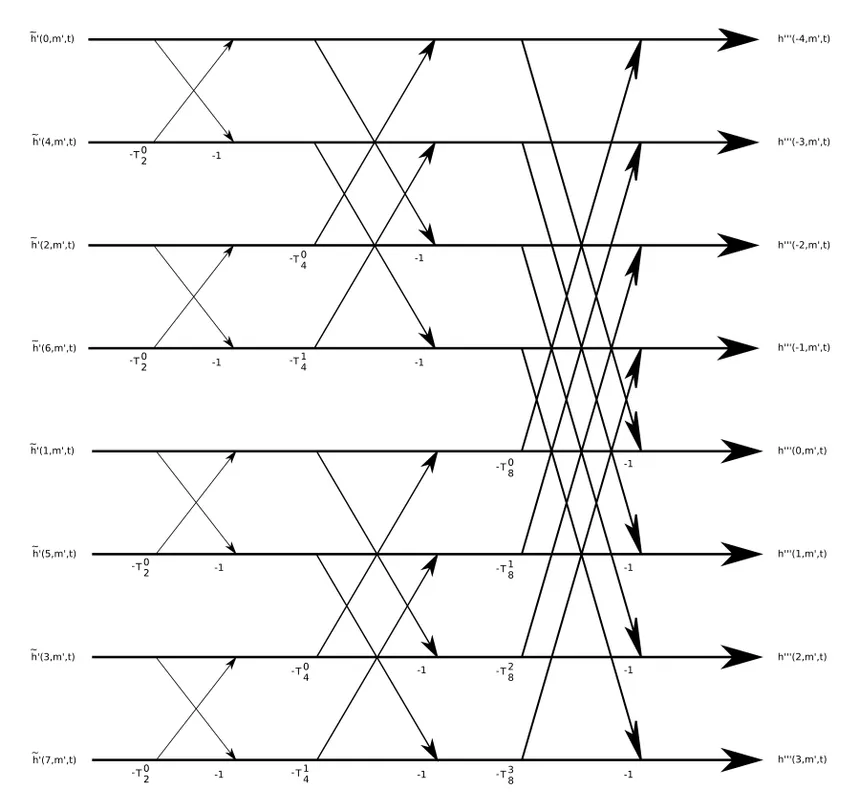

Enter input signal 3,0,3,0,3,0,3,0
enter N point 3


8
time taken:  0.0
[12.+0.j  0.+0.j  0.+0.j  0.+0.j 12.+0.j  0.+0.j  0.+0.j  0.+0.j]


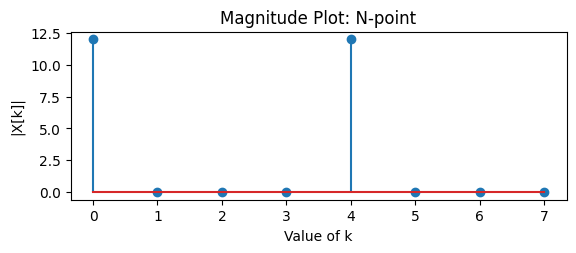

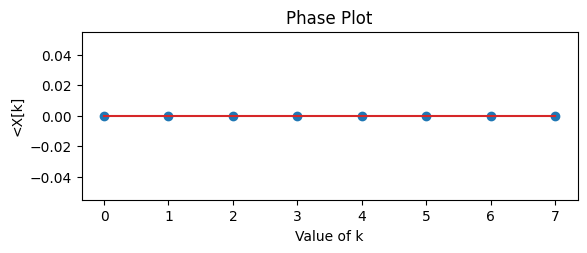

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import cmath
import time 
xt = np.array(input('Enter input signal').split(',')).astype(int)
N = int(input('enter N point'))

if 2**N < len(xt):
    print('N too low')
elif 2**N >= len(xt):
    if 2**N > len(xt):
        xt = np.pad(xt,(0,(2**N - len(xt))))
    k = len(xt)
    bt = np.zeros(k, dtype='complex')
    xnt = list(xt)
    start = time.time()
    for i in range(k):
        b = '{:0{width}b}'.format(i, width=N)
        bt[i] = complex(xt[int(b[::-1], 2)])
    xt = bt
    # yt = np.zeros(k, dtype='complex')
    for i in range(1,N+1):
        twiddle = []
        for t in range(0,2**(N-1) , 2**(N-i)):
            twiddle.append(np.round_(np.exp(complex(-1j)*2*np.pi*t*float(1/k)), decimals = 6))
            # print(twiddle)
        for j in range(int(2**(N-i))):
            for l in range(int(2**(i-1))):
                 if 2*i*j+l+2**(i-1) < k:
                    a = xt[2*j*i+l] + twiddle[l]*xt[2**(i-1)+l+2*j*i]
                    b = xt[2*i*j+l] - twiddle[l]*xt[2**(i-1)+l+2*j*i]
                    xt[2*j*i+l] = a 
                    xt[2*i*j+l+2**(i-1)] = b
        # xt = list(yt) 
    end = time.time()
    print(len(xt))
    print('time taken: ', end - start)
    print(xt)
    # start = time.time()
    # answer = np.fft.fft(xnt)
    # end = time.time()
    # print(answer, 'library time: ', end - start)
    k_array = np.arange(0,k,1)
    mag_y = [np.abs(i) for i in xt]
    plt.subplot(2,1,2)
    plt.stem(k_array,mag_y)
    plt.title("Magnitude Plot: N-point")
    plt.xlabel("Value of k")
    plt.ylabel("|X[k]|")
    plt.show()
    phase_y = [cmath.phase(kn) for kn in xt]
    plt.subplot(2,1,1)
    plt.stem(k_array,phase_y)
    plt.title("Phase Plot")
    plt.xlabel("Value of k")
    plt.ylabel("<X[k]")
    plt.show()

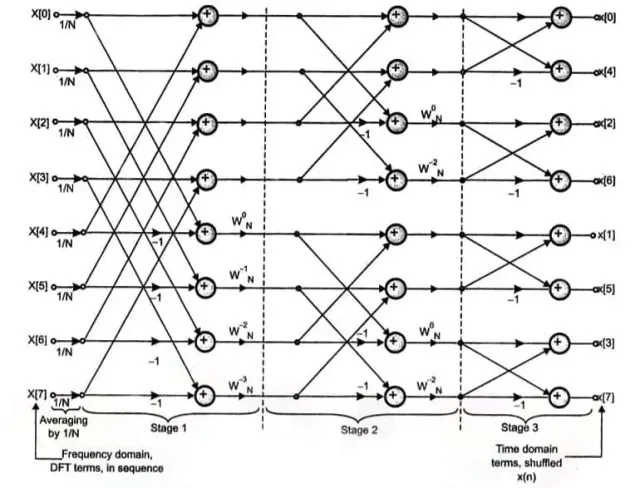

Enter input signal 3,0,3,0,3,0,3,0
enter N point 3


000
001
010
011
100
101
110
111
[12.+0.j  0.+0.j  0.+0.j  0.+0.j 12.+0.j  0.+0.j  0.+0.j  0.+0.j]


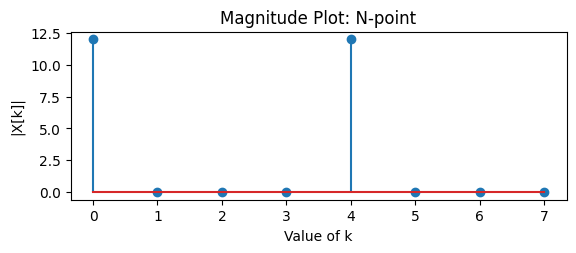

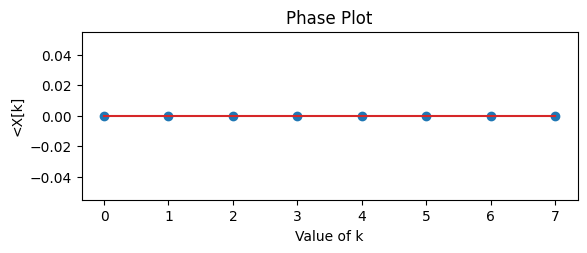

In [23]:
import numpy as np 
import matplotlib.pyplot as plt
import cmath
xt = np.array(input('Enter input signal').split(','), dtype='complex')
N = int(input('enter N point'))
if 2**N < len(xt):
    print('N too low')
elif 2**N >= len(xt):
    if 2**N > len(xt):
        xt = np.pad(xt,(0,(2**N - len(xt))))
    k = len(xt)
    # yt = np.zeros(k)
    for i in range(N,0,-1):
        twiddle = []
        for t in range(0,2**(N-1) ,2**(N-i)):
            twiddle.append(np.round_(np.exp(complex(-1j)*2*np.pi*t*float(1/k)), decimals = 6))
        for j in range(int(2**(N-i))):
            for l in range(int(2**(i-1))):
                    a = xt[2*j*i+l] + xt[2*i*j+l+2**(i-1)]
                    b = twiddle[l]*(xt[2*i*j+l] - xt[2*i*j+l+2**(i-1)])
                    xt[2*j*i+l] = a
                    xt[2*i*j+l+2**(i-1)] = b
        # xt = list(yt) 
    bt = np.zeros(k, dtype='complex')
    for i in range(k):
        b = '{:0{width}b}'.format(i, width=N)
        bt[i] = xt[int(b[::-1], 2)]
    xt = bt
    print(xt)
    k_array = np.arange(0,k,1)
    mag_y = [np.abs(i) for i in xt]
    plt.subplot(2,1,2)
    plt.stem(k_array,mag_y)
    plt.title("Magnitude Plot: N-point")
    plt.xlabel("Value of k")
    plt.ylabel("|X[k]|")
    plt.show()
    phase_y = [cmath.phase(kn) for kn in xt]
    plt.subplot(2,1,1)
    plt.stem(k_array,phase_y)
    plt.title("Phase Plot")
    plt.xlabel("Value of k")
    plt.ylabel("<X[k]")
    plt.show()